In [1]:
# coding: utf-8
# overfit

import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定

if not os.path.exists('dataset'):
    src='../../../dataset/presentation'
    dst='./dataset'
    os.symlink(src, dst)
if not os.path.exists('common'):
    src='../../../common/presentation'
    dst='./common'
    os.symlink(src, dst)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
weight_decay_lambda = 0 # weight decayを使用しない場合
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.08666666666666667, test acc:0.09
epoch:1, train acc:0.08666666666666667, test acc:0.0998
epoch:2, train acc:0.10666666666666667, test acc:0.1139
epoch:3, train acc:0.12, test acc:0.1223
epoch:4, train acc:0.17, test acc:0.1354
epoch:5, train acc:0.18666666666666668, test acc:0.1424
epoch:6, train acc:0.18333333333333332, test acc:0.145
epoch:7, train acc:0.20333333333333334, test acc:0.1472
epoch:8, train acc:0.22666666666666666, test acc:0.1574
epoch:9, train acc:0.23333333333333334, test acc:0.1679
epoch:10, train acc:0.24333333333333335, test acc:0.1814
epoch:11, train acc:0.2733333333333333, test acc:0.1933
epoch:12, train acc:0.29333333333333333, test acc:0.1925
epoch:13, train acc:0.31666666666666665, test acc:0.2109
epoch:14, train acc:0.33, test acc:0.2193
epoch:15, train acc:0.37666666666666665, test acc:0.246
epoch:16, train acc:0.38333333333333336, test acc:0.2479
epoch:17, train acc:0.4266666666666667, test acc:0.2694
epoch:18, train acc:0.4366666666666

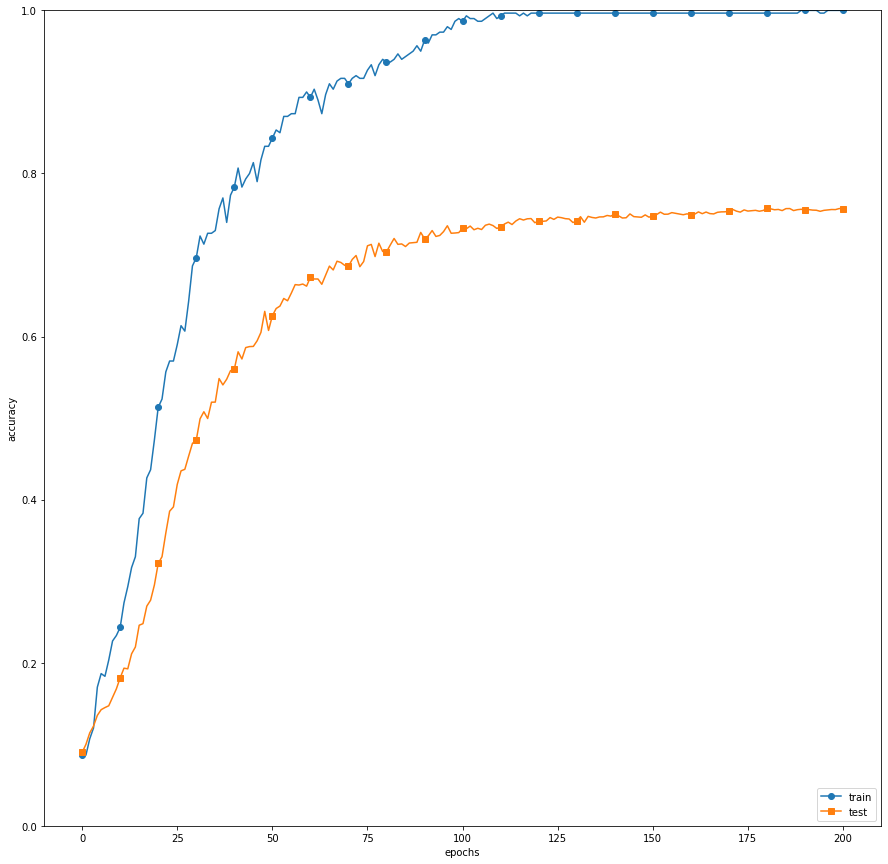

In [2]:
# 3.グラフの描画==========
fig = plt.figure(figsize=(15,15)) # グラフの全体サイズを拡大
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
fig.savefig("no_weight_decay.png")